# Assignment 01
Name: Yan Qinlin  
SID: 12231096  
Date: 2022/9/30

In [1]:
import random
from math import *
import matplotlib.pyplot as plt
import numpy as np

## 1. Flowchart

In [4]:
def Print_vallues(a, b, c):
    output = 0
    if(a>b):
        if(b>c):
            output = (a+b-10*c)
        else:
            if(a>c):
                output = (a+c-10*b)
            else:
                output = (c+a-10*b)
    else:
        if(b>c):
            if(a>c):
                output = (a+c-10*b)
            else:
                output = (c+a-10*b)
        else:
            output = (c+b-10*a)
    
    return(output)

In [3]:
a = 10
b = 5
c = 1
print(Print_vallues(a, b, c))

5


**Ref:**
The attached figure of this question was unclear (one arrow pointed to unknow). So I asked TA Li and Chen for a clear understanding.

## 2. Continuous celing function

In [2]:
def F(x): #使用递归的方法
    if (x == 1):
        return (x)
    else:
        return F(ceil(x/3))+2*x


In [3]:
list_input = [int(i) for i in input("Create a list seperated by a blank space:").split()]
N = len(list_input)
for x in range(N):
    print(F(list_input[x]))

Create a list seperated by a blank space:4 7
13
21


## 3. Dice rolling

### 3.1 

In [99]:
#概率 
##x = 60 #
def Find_number_of_ways(x):
    # 初始化一些定值：骰子个数和面数
    face = 6
    dice = 10
    value =[]
    count = []
    
    for i in range(1,dice+1):
        #把每次掷骰子之后所有可能性的sum都写在同一行
        value.append(list(range(i,(face)*i+1)))   
        #把每次掷骰子之后所有可能性的方式都写在同一行，这里初始化全是0
        count.append(list(0 for j in range(i,(face)*i+1)))   
    count[0] = [1,1,1,1,1,1] #第一次掷骰子的可能性全是1
    
    for i in range(1,dice):
        mid = 0
        if (len(value[i])%2==0):  #当前这次掷骰子可能的结果数为偶数
            mid =  len(value[i])/2 + i #中位数较小的那个的值 
        else:  ##当前这次掷骰子可能的结果数为奇数
            mid =  (len(value[i])-1)/2 +1+i #中位数较小的那个的值 
            
        for j in range(len(value[i])):  #当前位置为value[i][j],   本层要填充count[i][j]
            N = 0 
            if (value[i][j] <= mid):  #先计算对称的左半边
                for k in range(len(value[i-1])):  #在上一次掷骰子的结果中
                    #当前骰子数比之前多次累计sum要大
                    if (value[i][j] - value[i-1][k] > 0 and value[i][j] - value[i-1][k] < 7):  
                        N = N + count[i-1][k] #记录之前多次累计sum对应的count
                count[i][j] = N
                count[i][len(value[i])-1-j] = N
     
    #找到最终sum在列表count中的索引，再得到可能的次数
    index = value[dice-1].index(x)
    N = count[dice-1][index]
    return(N)


**Ref:**
The ideas of odd-even sorting and dynamic programming were inspired by the blogs from *xiongxu3381* (https://blog.csdn.net/xiongxu3381/article/details/74853554?spm=1001.2101.3001.6650.1&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromBaidu%7ERate-1-74853554-blog-80068601.pc_relevant_3mothn_strategy_recovery&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromBaidu%7ERate-1-74853554-blog-80068601.pc_relevant_3mothn_strategy_recovery&utm_relevant_index=2) and *CherryCheekAir* (https://blog.csdn.net/u010342040/article/details/80068601?spm=1001.2101.3001.6650.13&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromBaidu%7ERate-14-80068601-blog-108147269.pc_relevant_multi_platform_whitelistv4&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromBaidu%7ERate-14-80068601-blog-108147269.pc_relevant_multi_platform_whitelistv4&utm_relevant_index=13) respectively. 

### 3.2 count the number and the x yielding the maximum ways

In [102]:
Number_of_ways = []
res_index = []
for x in range(10,61):
    Number_of_ways.append(Find_number_of_ways(x))  
    res_index.append(x)
x_yield_max = res_index[res.index(max(Number_of_ways))]
print(x_yield_max)

35


## 4. Dynamic programming 

### 4.1 

In [5]:
def Random_integer(N):
    lst = []
    for i in range(N):
        lst.append(int(round(random.random()*10)))
    return(lst)

In [6]:
print(Random_integer(100))

[7, 3, 6, 5, 8, 3, 7, 0, 0, 3, 0, 6, 7, 7, 8, 4, 0, 4, 1, 1, 9, 6, 2, 2, 1, 2, 5, 3, 3, 2, 5, 7, 3, 4, 0, 4, 7, 1, 2, 5, 8, 4, 7, 1, 7, 3, 2, 1, 10, 10, 1, 7, 9, 8, 2, 10, 1, 4, 4, 3, 1, 8, 5, 9, 10, 5, 5, 0, 8, 1, 1, 9, 6, 0, 6, 9, 2, 5, 6, 2, 7, 0, 9, 2, 5, 3, 4, 3, 9, 1, 8, 9, 5, 8, 4, 9, 1, 6, 8, 10]


### 4.2

In [7]:
def Sum_averages(n):
    lst = Random_integer(n)
    subset = [[]] #用一个空[]初始化二维列表
    
    for i in lst:
        #单元素子集+之间出现过的元素=构成新的子集
        subset = subset + [[i] + j for j in subset] 
        
    del(subset[0])   #去掉第一个元素（一个空[]）
    avrg_lst = []   #求均值
    for n in subset:
        avrg_lst.append(sum(n)/len(n))
    return(sum(avrg_lst))
Sum_averages(4)  # 函数调用

75.0

### 4.3 

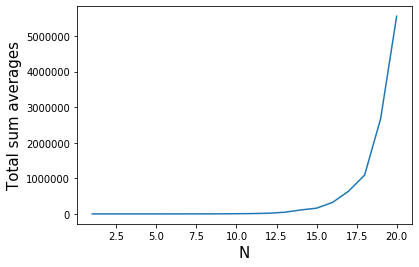

In [15]:
Total_sum_averages=[]
for N in range(1,21):
    Total_sum_averages.append(Sum_averages(N))
x = np.linspace(1,20,20)
plt.plot(x,Total_sum_averages)
plt.xlabel('N',size=15)
plt.ylabel('Total sum averages',size=15)
plt.show()


Due to the insufficient memory of disk C, this chunk call Sum_averages with N increasing from 1 to 20. As shown in the figure above, the total sum averages of the subsets rise with the increase of N (the length of the original integer list). Besides, the longer the original list, the larger slope the curve will have. 

**Ref:**
This was inspired by the blogs from 桉夏与猫(https://blog.csdn.net/qq_28790663/article/details/118085473?ops_request_misc=&request_id=&biz_id=102&utm_term=python%E6%B1%82%E4%BB%BB%E6%84%8F%E9%95%BF%E5%BA%A6%E5%88%97%E8%A1%A8%E7%9A%84%E5%AD%90%E9%9B%86&utm_medium=distribute.pc_search_result.none-task-blog-2~blog~sobaiduweb~default-0-118085473.article_score_rank_blog&spm=1018.2226.3001.4450).

## 5. Path counting 

### 5.1

In [119]:

matrixx = np.ones((M,N))

for i in range(M):
    for j in range(N):
        if ((i == 0 and j == 0) or (i == (M-1) and j == (N-1))):
            break
        else:
            matrixx[i][j] = round(random.random())

print(matrixx)    
    

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 0. 1. 1. 1. 1. 0. 1. 0.]
 [1. 0. 0. 1. 1. 1. 1. 0. 1. 0.]
 [0. 0. 1. 1. 1. 0. 1. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 1. 0. 0.]
 [0. 1. 1. 1. 1. 0. 0. 0. 1. 1.]]


### 5.2

In [2]:
def Count_path(m):   #深度优先搜索+栈
    stack = []
    stack.append([1,1])
    i=1
    j=1
    ways = 0
    #fork记录岔路口所在节点位置，[i,j,第几次回到岔路口]  
    #第几次回到岔路口=0为第一次来，=1是曾经回溯到此一次
    fork = []  
    if(ways>3100): return(ways)
    while True:
        if(ways>3100): return(ways)
        if (i==8 and j==10): #判断是否到出口，是的话路径+1
            ways +=1
            temp = 0
            
            while (len(stack)>1): #当栈里还有元素时，一直回溯到上一个岔路口
                stack.pop()
                i = stack[-1][0]; j = stack[-1][1]
                if(len(fork)!=0 and i==fork[-1][0] and j==fork[-1][1] and fork[-1][2]==0):
                    temp=1
                    break #当第一次回溯到最远的岔路口
                #当第二次回溯到最远的岔路口
                elif(len(fork)!=0 and i==fork[-1][0] and j==fork[-1][1] and fork[-1][2]==1):
                    fork.pop()
                    if(len(fork)==0):return(ways)
                    temp=1
                    continue
                    
            #temp=0代表： 最后一种走法被记录后回溯到起点，直接出大循环
            if(temp==0):return(ways)   


        if (m[i][j+1]==0 and m[i+1][j]==0): #[[1,0][0, ]] 一共四种情况
            if(len(stack)==0):break#一出来就没路，直接无了
            while (len(stack)>1): #一直回溯到上一个fork
                stack.pop()
                i = stack[-1][0]; j = stack[-1][1]
                #当第一次回溯到最远的岔路口
                if(len(fork)!=0 and i==fork[-1][0] and j==fork[-1][1] and fork[-1][2]==0):break 
                    
                #当第二次回溯到最远的岔路口
                elif(len(fork)!=0 and i==fork[-1][0] and j==fork[-1][1] and fork[-1][2]==1):
                    fork.pop()
                    if(len(fork)==0):return(ways)
                    continue
            

        elif (m[i][j+1]==1 and m[i+1][j]==0): #[[1,1][0, ]]
            stack.append([i,j+1])
            j+=1
        elif (m[i][j+1]==0 and m[i+1][j]==1): #[[1,0][1, ]]
            stack.append([i+1,j])
            i+=1
        elif (m[i][j+1]==1 and m[i+1][j]==1): #[[1,1][1, ]] 优先向右
           
            if(len(fork)==0):  #此前没有岔路口且第一次遇到岔路口，则优先向右
                fork.append([i,j,0])  #记录此处为岔路口fork
                stack.append([i,j+1])
                j+=1
            
            elif(list(fork[-1])==[i,j,0] ):  #第一次退回到此，则选择向下走
                fork[-1]=[i,j,1] #标记此岔路口回溯过一次
                stack.append([i+1,j])  #向下走
                i+=1
            elif(list(fork[-1])==[i,j,1]):#这是第二次退回到此，则继续回溯
                fork.pop()
                stack.pop()
                    
                if(len(stack)==0):break  #已经回溯到起点了,且起点本身就是一个岔路口
                while True:#确保一直回溯到上一个岔路口
                    #回溯到上个岔路口作为当前，出循环
                    if(stack[-1]==[fork[-1][0],fork[-1][1]]):
                        i = stack[-1][0]; j = stack[-1][1];fork[-1]==[i,j,0];break 
                    stack.pop()
                            
            else: #此前有岔路口但第一次到这里，则优先选择向右走
                #如果岔路口列表没有此点（区分回溯）
                if(fork[-1][0]!=i or fork[-1][1]!=j):  
                    fork.append([i,j,0])  #记录此处为岔路口fork
                    stack.append([i,j+1])
                j+=1

   
    return(ways)

### 5.3

In [3]:
def create_matrix(M,N): #生成要求的矩阵，并且四周加一圈0以避免溢出
    matrixx = np.ones((M,N))

    for i in range(M):
        for j in range(N):
            if ((i == 0 and j == 0) or (i == (M-1) and j == (N-1))):
                break
            else:
                matrixx[i][j] = round(random.random())
    col = np.zeros(M) #行
    matrixx = np.c_[col,matrixx,col] #左右两边额外加一列0
    row=[]
    for i in range(N+2): row.append(0)
    matrixx = np.append(matrixx,[row],axis=0)
    matrixx = np.insert(matrixx,0,[row],axis=0)#上下两边额外加一行0
    return(matrixx)

In [4]:
path = []
for i in range(1000):
    ma_tmp = create_matrix(8,10)
    path.append(Count_path(ma_tmp))
print(path)
print(np.mean(path)) #1000次计算结果的均值

[0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 24, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 0, 0, 1, 0, 18, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 96, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 18, 15, 0, 0, 1, 0, 12, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 8, 0, 0, 1, 0, 0, 0, 3, 0, 45, 0, 0, 0, 2, 0, 0, 22, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 18, 0, 0, 0, 0, 14, 0, 20, 0, 0, 0, 0, 0, 0, 0, 4, 5, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0

The average of total number of paths from the 1000 runs is a small value (1.431 in this run). That is becuase most of the results turned to be 0.

**Ref:**
The thought of using stack was inspired by the blog of *weixin_39529914* (https://blog.csdn.net/weixin_39529914/article/details/113992567).And the realization of stack in python referred to the website called *geek-docs* (https://geek-docs.com/python/python-examples/python-stack-lifo.html).